# Graph Network
- Create edges and plot graph
- Preliminary analysis
- Community detection and wordclouds

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import os
import sys
sys.path.append(os.path.abspath("../Notebooks"))
from helper_functions import  *
from tqdm import tqdm

In [21]:
#from fa2 import ForceAtlas2
import matplotlib.pyplot as plt
from itertools import count,combinations

from statistics import mean
from scipy import stats

In [22]:
import networkx

# Import Data

In [23]:
# Read compressed csv with built-in gzip support
df_recipes = decompress_pickle('../Data/file4.pbz2') 
df_ingredients = pd.read_csv('../Data/ingredients_with_recipies.csv')
df_reviews = decompress_pickle('../Data/reviews_zipped.pbz2') 

In [24]:
df_recipes.head()
#print(df_recipes.shape)

,name,id,minutes,ingredients,n_ingredients,ingredient_ids
0,arriba baked winter squash mexican style,137739,55,"[winter squash, mexican seasoning, mixed spice...",7,"[7933, 4694, 4795, 3723, 840, 5006, 6270]"
1,a bit different breakfast pizza,31490,30,"[prepared pizza crust, sausage patty, eggs, mi...",6,"[5481, 6324, 2499, 4717, 6276, 1170]"
2,alouette potatoes,59389,45,"[spreadable cheese with garlic and herbs, new ...",11,"[1170, 4918, 6426, 5185, 7099, 5006, 6009, 627..."
3,apple a day milk shake,5289,0,"[milk, vanilla ice cream, frozen apple juice c...",4,"[4717, 7474, 2946, 150]"
4,aww marinated olives,25274,15,"[fennel seeds, green olives, ripe olives, garl...",9,"[2587, 3437, 5002, 3184, 5324, 5068, 5058, 131..."


In [25]:
df_ingredients.head()
print(df_ingredients.shape)

(11659, 9)


In [26]:
df_reviews.head()
print(df_reviews.shape)

(1132367, 5)


In [27]:
# Convert to dtype and check 
df_reviews['date'] = pd.to_datetime(df_reviews['date'])
df_reviews.dtypes

user_id               int64
recipe_id             int64
date         datetime64[ns]
rating                int64
review               object
dtype: object

In [28]:
# Filter years 2017 + 2018 as our final subset 

df_reviews_filter = df_reviews[df_reviews['date'].dt.strftime('%Y') > '2016']
df_reviews_filter.shape

(47709, 5)

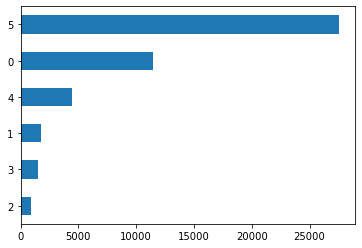

In [29]:
# Value counts for each of the rating values
df_reviews_filter.rating.value_counts().sort_values().plot(kind = 'barh')
None

In [30]:
df_reviews_filter

,user_id,recipe_id,date,rating,review
39,2002068522,29093,2018-03-26,0,i made it and it was amazing
67,2002097693,79222,2018-04-05,0,Do you have cook the potatoes beforehand?
134,2001891832,183729,2018-04-30,0,There is no cooking temp?????? Love this recip...
184,2001338551,195977,2017-04-04,0,Have made this cake often. Have added 1 1/2 c ...
192,571722,195977,2017-01-09,1,"This was incredibly sweet, and I reduced the s..."
...,...,...,...,...,...
1132315,2000431901,40514,2017-11-25,5,SO good! I ate 4 of them fresh from the oven!
1132325,2000650711,290157,2017-04-10,0,Would this make a good hamburger patty seasoning?
1132359,2001898209,82303,2018-07-05,5,This is the best and easiest hot fudge ever. I...
1132360,2002357020,82303,2018-12-05,5,Delicious quick thick chocolate sauce with ing...


# Create edges

In [31]:
recipes_user_dict={id: [] for id in df_recipes['id'].unique()}
print(len(recipes_user_dict))
recipe_error = []


for idx, row in tqdm(df_reviews_filter.iterrows()): 
    try:
        #for ingredient in row['ingredient_ids']:
        recipes_user_dict[row['recipe_id']].append(row['user_id'])
    except:
        recipe_error.append(row['recipe_id'])


# All possible pairs in List using combinations()
edges_ru = [(x,y, {"recipe_id": key})  for key in recipes_user_dict for x, y in list(combinations(recipes_user_dict[key], 2))]   


178265


47709it [00:01, 27073.10it/s]


In [32]:
#Statistics on number of reviews per recipe

mean = np.mean(df_reviews_filter['recipe_id'].value_counts())
median = np.median(df_reviews_filter['recipe_id'].value_counts())
mode = stats.mode(df_reviews_filter['recipe_id'].value_counts())[0]
d_min = np.min(df_reviews_filter['recipe_id'].value_counts())
d_max = np.max(df_reviews_filter['recipe_id'].value_counts())

print(f"Mean: {mean}")
print(f'Median:{median}')
print(f'Mode:{mode}')
print(f'Min:{d_min}')
print(f'Max:{d_max}')


Mean: 2.405293672800605
Median:1.0
Mode:[1]
Min:1
Max:716


Mean: 1.2472941176470589
Median:1.0
Mode:[1]
Min:1
Max:207


Mean: 1.2220670391061452
Median:1.0
Mode:[1]
Min:1
Max:29


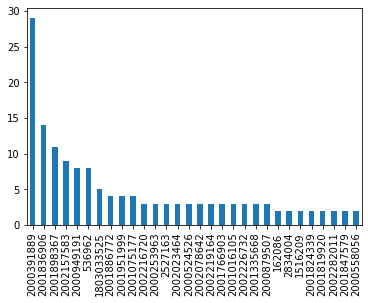

In [34]:
df_reviews_filter[df_reviews_filter['user_id'].isin(df_reviews_filter[df_reviews_filter['recipe_id']==2886]['user_id'])]['user_id'].value_counts().head(30).plot.bar()

banana_bread_users_test= df_reviews_filter[df_reviews_filter['user_id'].isin(df_reviews_filter[df_reviews_filter['recipe_id']==2886]['user_id'])]['user_id'].value_counts()
banana_bread_users= df_reviews_filter[df_reviews_filter['user_id'].isin(df_reviews_filter[df_reviews_filter['recipe_id']==2886]['user_id'])]['user_id']

mean = np.mean(banana_bread_users_test)
median = np.median(banana_bread_users_test)
mode = stats.mode(banana_bread_users_test)[0]
d_min = np.min(banana_bread_users_test)
d_max = np.max(banana_bread_users_test)

print(f"Mean: {mean}")
print(f'Median:{median}')
print(f'Mode:{mode}')
print(f'Min:{d_min}')
print(f'Max:{d_max}')

<AxesSubplot:>

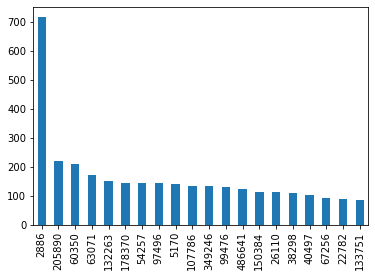

In [35]:
df_reviews_filter['recipe_id'].value_counts().head(20).plot.bar()

## Create Graph

In [36]:
#!pip install networkx
import networkx as nx

G = nx.MultiDiGraph()
G.add_nodes_from(np.unique(df_reviews_filter['user_id'].values))
print(G)

G.add_edges_from(edges_ru)
print(G)



MultiDiGraph with 38250 nodes and 0 edges
MultiDiGraph with 38250 nodes and 590460 edges


In [37]:
df_graph=pd.DataFrame()
df_graph['user_id']=(np.unique(df_reviews_filter['user_id'].values))

# Graph analysis

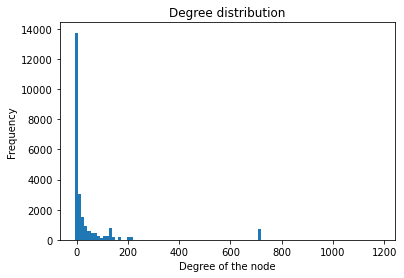

Slope of distribution: -0.9477423223385324


In [38]:

# In and out degree distributions & slope estimate(W5)
def plot_deg_dist(G, title = str):

    degree_list = [val for (node, val) in G.degree() if val != 0]

    counts, edges = np.histogram(degree_list, bins = 100)
    plt.bar(edges[:-1], counts, width=np.diff(edges))
    plt.title(title)
    plt.xlabel('Degree of the node')
    plt.ylabel('Frequency')
    plt.show()
    idx = np.isfinite(np.log(edges[:10])) & np.isfinite(np.log(counts[:10]))
    slope, intercept = np.polyfit(np.log(edges[:10])[idx], np.log(counts[:10])[idx], 1)
    print(f'Slope of distribution: {slope}')

plot_deg_dist(G, title = 'Degree distribution')  
    

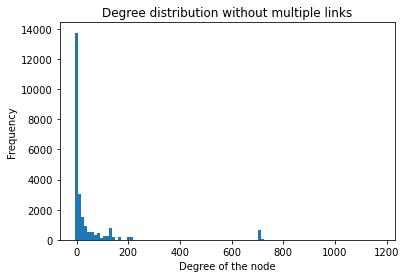

Slope of distribution: -0.9447117454222944


In [39]:
G2 = nx.Graph(G)
plot_deg_dist(G2, title = 'Degree distribution without multiple links')  

In [40]:
# Obtain largest component
largest_cc = max(nx.connected_components(G2))
GCC = G2.subgraph(largest_cc).copy()

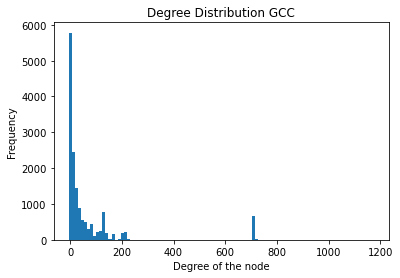

Slope of distribution: -0.7595052310486371


In [41]:
plot_deg_dist(GCC, title = 'Degree Distribution GCC')

In [42]:
degree_list = [val for (node, val) in GCC.degree()]
# Calculate stats
mean = np.mean(degree_list)
median = np.median(degree_list)
mode = stats.mode(degree_list)[0]
d_min = np.min(degree_list)
d_max = np.max(degree_list)

print(f"Mean: {mean}")
print(f'Median:{median}')
print(f'Mode:{mode}')
print(f'Min:{d_min}')
print(f'Max:{d_max}')

Mean: 74.61309562823622
Median:21.0
Mode:[715]
Min:1
Max:1179


In [47]:
# df with reviews for recipies that are a part of the graph

GCC_multi=G.subgraph(GCC.nodes)


nodes_gcc = [node for node in GCC.nodes]
recipies = [recipe['recipe_id'] for node1, node2, recipe in GCC_multi.edges(data=True)]

df_graph_reviews = df_reviews_filter[df_reviews_filter['user_id'].isin(nodes_gcc) & df_reviews_filter['recipe_id'].isin(recipies)]

In [49]:
#Statistics on number of reviews per user

mean = np.mean(df_graph_reviews['user_id'].value_counts())
median = np.median(df_graph_reviews['user_id'].value_counts())
mode = stats.mode(df_graph_reviews['user_id'].value_counts())[0]
d_min = np.min(df_graph_reviews['user_id'].value_counts())
d_max = np.max(df_graph_reviews['user_id'].value_counts())

print(f"Mean: {mean}")
print(f'Median:{median}')
print(f'Mode:{mode}')
print(f'Min:{d_min}')
print(f'Max:{d_max}')

Mean: 1.256275807825916
Median:1.0
Mode:[1]
Min:1
Max:87


In [50]:
#Statistics on number of reviews per recipe

mean = np.mean(df_graph_reviews['recipe_id'].value_counts())
median = np.median(df_graph_reviews['recipe_id'].value_counts())
mode = stats.mode(df_graph_reviews['recipe_id'].value_counts())[0]
d_min = np.min(df_graph_reviews['recipe_id'].value_counts())
d_max = np.max(df_graph_reviews['recipe_id'].value_counts())

print(f"Mean: {mean}")
print(f'Median:{median}')
print(f'Mode:{mode}')
print(f'Min:{d_min}')
print(f'Max:{d_max}')

Mean: 7.552009456264775
Median:3.0
Mode:[2]
Min:2
Max:716


# Plot Graph with Force Atlas

In [26]:
def plot_graph_fa(G,iterations, edge_color, node_color, title):

    forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=2.0,

                        # Performance
                        jitterTolerance=7.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.6,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.1,
                        strongGravityMode=True,
                        gravity=15.0,

                        # Log
                        verbose=True)



    # Gets positions of the nodes 
    positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=iterations)

    # Node size dictionary according to degrees
    d = dict(nx.degree(G))

    # Create color mapping dictionary
    #mapping = {"Marvel": 'red', "DC": 'black'}
    #colors = [mapping[GCC_U.nodes[n]['universe']] for n in GCC_U.nodes()]



    # Plot the Network 
    plt.figure(3,figsize=(25,25)) 
    nc = nx.draw_networkx_nodes(G, 
                        positions, 
                        node_size=[v * 0.1 for v in d.values()], 
                        #node_size = 10,
                        label=True,  
                        node_color=node_color,
                        #cmap=plt.cm.plasma_r, 
                        )

    ec = nx.draw_networkx_edges(G, 
                                positions, 
                                edge_color="#ECC836", 
                                alpha=0.2)

    plt.axis('off')
    plt.title(title, size = 20)
    plt.show()

    

    return None

100%|██████████| 2000/2000 [08:11<00:00,  4.07it/s]


BarnesHut Approximation  took  228.85  seconds
Repulsion forces  took  196.00  seconds
Gravitational forces  took  0.23  seconds
Attraction forces  took  52.39  seconds
AdjustSpeedAndApplyForces step  took  6.50  seconds


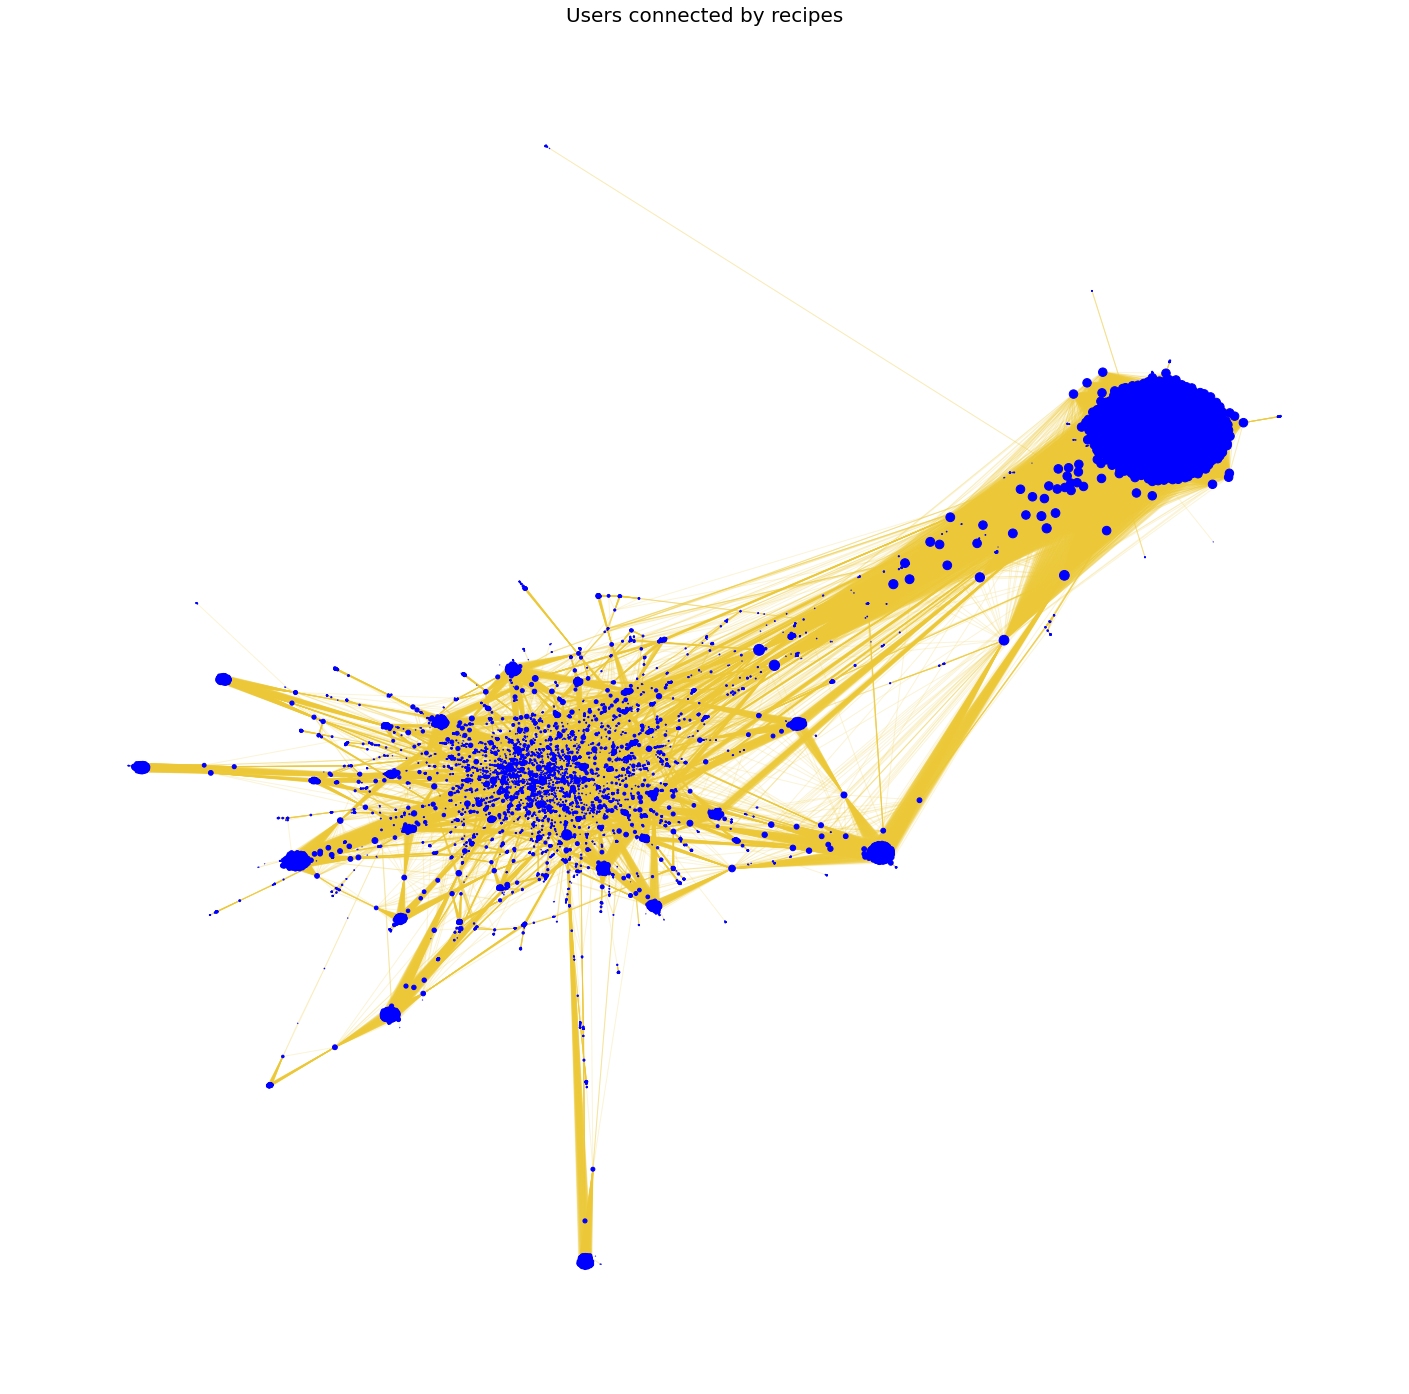

In [29]:
plot_graph_fa(GCC, iterations = 2000, edge_color="#ECC836",node_color='blue', title = 'Users connected by recipes')

# Communities detection

In [28]:
%pip install python-louvain
import community.community_louvain as community

Note: you may need to restart the kernel to use updated packages.


In [29]:

# first compute the best partition for GCC
partition = community.best_partition(GCC)

# find modularity
M = community.modularity(partition, GCC)
print(f"Users graph modularity = {M} - found using community.modularity function")

from collections import Counter

#communities stats
count = Counter(partition.values())
print(f"Number of communities: {len(count)}")

from collections import Counter
count_size = Counter(count.values())

for key in count_size:
    print(f"{count_size[key]} communities of size {key} nodes was found")

largest_10_communities=sorted(count.items(), key=lambda item: item[1])[-10:]

Users graph modularity = 0.760585802976668 - found using community.modularity function
Number of communities: 71
2 communities of size 222 nodes was found
1 communities of size 696 nodes was found
1 communities of size 495 nodes was found
1 communities of size 1166 nodes was found
1 communities of size 455 nodes was found
1 communities of size 737 nodes was found
1 communities of size 194 nodes was found
1 communities of size 176 nodes was found
1 communities of size 463 nodes was found
1 communities of size 310 nodes was found
1 communities of size 208 nodes was found
1 communities of size 344 nodes was found
1 communities of size 220 nodes was found
1 communities of size 14 nodes was found
1 communities of size 360 nodes was found
1 communities of size 318 nodes was found
1 communities of size 74 nodes was found
1 communities of size 252 nodes was found
1 communities of size 256 nodes was found
1 communities of size 192 nodes was found
3 communities of size 329 nodes was found
1 comm

100%|██████████| 1000/1000 [06:39<00:00,  2.50it/s] 


BarnesHut Approximation  took  178.38  seconds
Repulsion forces  took  171.74  seconds
Gravitational forces  took  0.22  seconds
Attraction forces  took  39.45  seconds
AdjustSpeedAndApplyForces step  took  3.96  seconds


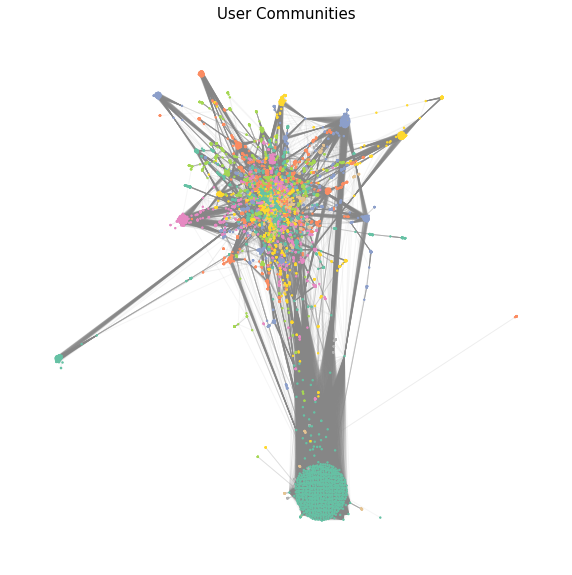

In [34]:
# Visualize with Force Atlas
import matplotlib.cm as cm

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=2.0,

                        # Performance
                        jitterTolerance=7.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.6,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.1,
                        strongGravityMode=True,
                        gravity=15.0,

                        # Log
                        verbose=True)

# Gets positions of the nodes 
positions = forceatlas2.forceatlas2_networkx_layout(GCC, pos=None, iterations=1000)

plt.figure(3,figsize=(10,10)) 

# color the nodes according to their partition
cmap = cm.get_cmap('Set2', max(partition.values()) + 1)

nc = nx.draw_networkx_nodes(GCC, 
                       positions, 
                       node_size=2.0, 
                       label=True,  
                       node_color=list(partition.values()),
                       cmap=cmap, 
                       )

ec = nx.draw_networkx_edges(GCC, 
                            positions, 
                            edge_color='gray', 
                            alpha=0.07)

plt.axis('off')
plt.title('User Communities', size = 15)
plt.show()

In [30]:
df_graph['community'] = df_graph['user_id'].map(partition)
df_graph= df_graph.dropna()

df_graph.shape

# Save the df with the community numbers 
df_graph.to_csv('user_community_map.csv', index=False)

In [31]:
 # Take the largest 10 
largest_com = dict(df_graph['community'].value_counts().head(10))
list_largest_com = list(largest_com.keys())
print(f'The 10 largest communities are: {list_largest_com}')

The 10 largest communities are: [3.0, 5.0, 56.0, 40.0, 36.0, 26.0, 2.0, 47.0, 4.0, 33.0]


In [32]:
#make a subgraph for community

nodes_c1=df_graph[df_graph['community']==list_largest_com [0]]['user_id']

G_C1=G.subgraph(nodes_c1)
print(G_C1)

#find 
recipies = [recipe['recipe_id'] for node1, node2, recipe in G_C1.edges(data=True)]

c1_recipies=np.unique(np.array(recipies))
len(c1_recipies)

#IN PROGRESS - Ingredients workcloudszx

df_recipes['ingredients_str'] = df_recipes['ingredients'].apply(lambda x: ' '.join(x))
ing=''.join(''.join(df_recipes[df_recipes['id'].isin(c1_recipies)].ingredients_str.values))

MultiDiGraph with 1166 nodes and 7869 edges


In [33]:

from wordcloud import WordCloud
df_recipes['ingredients_str'] = df_recipes['ingredients'].apply(lambda x: ' '.join(x))


def community_subgraph(community_idx):

    #make a subgraph for community
    nodes_c1=df_graph[df_graph['community']==community_idx]['user_id']
    G_C1=G.subgraph(nodes_c1)
    #print(G_C1)

    return G_C1



## Plotting the community graphs

In [ ]:
# Plotting the communities graphs

#////// TODO  plot all of them, for some reason sometimes the kernel blocks - Lu


com_graphs = {}

for community_idx in list_largest_com:
    GC_subgraph = community_subgraph(community_idx)
    com_graphs[community_idx] = GC_subgraph


# list(com_graphs.values())[0]

#plot_graph_fa(list(com_graphs.values())[0], iterations = 1000, edge_color="#ECC836",node_color='blue', title = 'Users Community 1')

## Community wordclouds

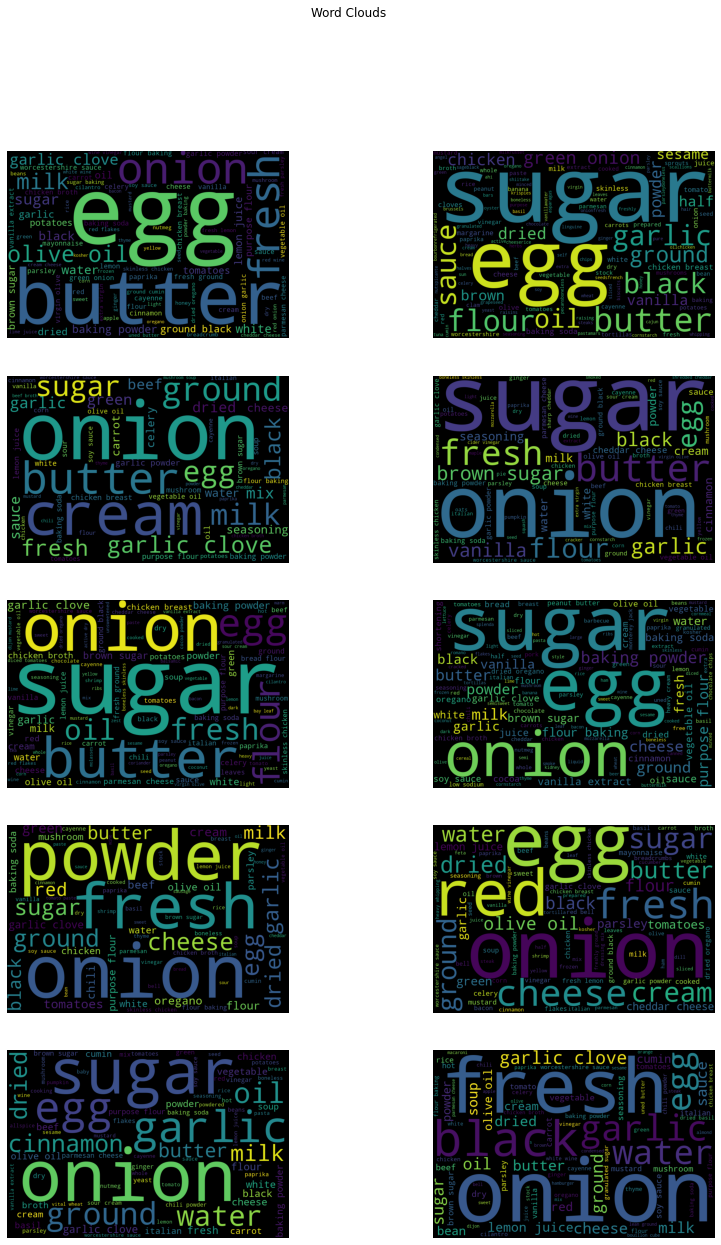

In [34]:
from collections import Counter


def ingredients_list(G_C1):
    #return ingredients list for recipies that are part of the graph

    #find 
    recipies = [recipe['recipe_id'] for node1, node2, recipe in G_C1.edges(data=True)]

    c_recipies=np.unique(np.array(recipies))
    #IN PROGRESS - Ingredients workclouds
    ing=''.join(''.join(df_recipes[df_recipes['id'].isin(c_recipies)].ingredients_str.values))
    return ing


fig = plt.figure(figsize=(14, 20))
fig.patch.set_alpha(0.0)    
fig.suptitle('Word Clouds')

k=0

for community_idx in list_largest_com:

    GC_subgraph = community_subgraph(community_idx)
    ingredients = ingredients_list(GC_subgraph)
    ing_list = ingredients.split(" ")
    

    #print(f'Top 10 ingredients for community {community_idx}:')

    counter =Counter(ing_list)
    top_10=counter.most_common(10)
    
    #print(top_10)

    #remove onion, salt, pepper - most common ing in every community
    ingredients = ingredients.replace('salt', "").replace('pepper', "")

    
    word_cloud = WordCloud(width=900,
                           height=600,
                           #background_color='white',
                           min_font_size=14).generate(ingredients)

    plt.subplot(5, 2, k + 1)
    plt.imshow(word_cloud)
    plt.axis('off')
    
    k+=1
    

In [45]:

from nltk.probability import FreqDist

# Calculate TF and extract 5 most common words for each of the 10 communities in the marvel universe
def TF_com(dic_texts, printing=False):
     # List to store all TF for every community in the dictionary of texts
    TF_com_global = []
    for key, value in dic_texts.items():
        #TF for 1 community
        TF_com = FreqDist(value)
        TF_com_global.append(TF_com)
         #Most common 5 words for 1 community
        most_common_marvel_com = TF_com.most_common(5)
        print(f'Community {key}')
        print(most_common_marvel_com)
    return TF_com_global

TF_com_global = []

for community_idx in list_largest_com:

    GC_subgraph = community_subgraph(community_idx)
    ingredients = ingredients_list(GC_subgraph)
    ingredients = ingredients.replace('salt ', "").replace('pepper ', "")

    ing_list = ingredients.split(" ")


    #print(f'Top 10 ingredients for community {community_idx}:')

    counter =Counter(ing_list )
    top_10=counter.most_common(10)

    TF_com = FreqDist(ing_list)
    TF_com_global.append(TF_com)

    #Most common 5 words for 1 community
    most_common_marvel_com = TF_com.most_common(10)
    print(f'Community {community_idx}')
    print(most_common_marvel_com)
    print(top_10)




Community 3.0
[('garlic', 200), ('fresh', 182), ('oil', 180), ('sugar', 167), ('onion', 156), ('ground', 156), ('butter', 138), ('powder', 127), ('olive', 106), ('black', 105)]
[('garlic', 200), ('fresh', 182), ('oil', 180), ('sugar', 167), ('onion', 156), ('ground', 156), ('butter', 138), ('powder', 127), ('olive', 106), ('black', 105)]
Community 5.0
[('sugar', 11), ('butter', 10), ('chicken', 9), ('flour', 8), ('green', 7), ('black', 7), ('garlic', 7), ('sauce', 7), ('eggs', 6), ('baking', 6)]
[('sugar', 11), ('butter', 10), ('chicken', 9), ('flour', 8), ('green', 7), ('black', 7), ('garlic', 7), ('sauce', 7), ('eggs', 6), ('baking', 6)]
Community 56.0
[('garlic', 44), ('onion', 42), ('sauce', 29), ('oil', 29), ('sugar', 28), ('powder', 28), ('chicken', 26), ('cream', 26), ('butter', 25), ('flour', 25)]
[('garlic', 44), ('onion', 42), ('sauce', 29), ('oil', 29), ('sugar', 28), ('powder', 28), ('chicken', 26), ('cream', 26), ('butter', 25), ('flour', 25)]
Community 40.0
[('sugar', 42)

In [46]:
import math
# Calculate IDF for each of the communities 
def IDF_com(TF_com_global,N):
    IDF_global = []
    for i in range(N):
        IDF = []
        for term, term_freq in TF_com_global[i].items():
            term_IDF = math.log(float(N) / term_freq + 1)
            IDF.append((term,term_IDF))
        IDF_global.append(IDF)

    return IDF_global

IDF_global = IDF_com(TF_com_global,N=10)

# Sort TF words to match the order of the IDF lists
TF_com_global_sorted = []
N=10
for i in range(N):
        TF_com_sorted = [] 
        for term, term_freq in TF_com_global[i].items():
                elem = (term,term_freq)
                #list of sorted words and freq of 1 comunnity
                TF_com_sorted.append(elem)
        # append it to the list of lists
        TF_com_global_sorted.append(TF_com_sorted)

# Calculate TF-IDF for each of the communities

def TF_IDF_com(TF_com_global_sorted,IDF_global):
    
    TF_IDF_global = []

    for i in range(N):
        # convert to dict to multiply easy
        dict_1 = dict(TF_com_global_sorted[i])
        dict_2 = dict(IDF_global[i])
        result = {key: dict_1[key] * dict_2[key] for key in dict_1}
        
        #Append it to the list of communities
        TF_IDF_global.append(result) 
    return TF_IDF_global

# finally returns list
TF_IDF_global = TF_IDF_com(TF_com_global_sorted,IDF_global)

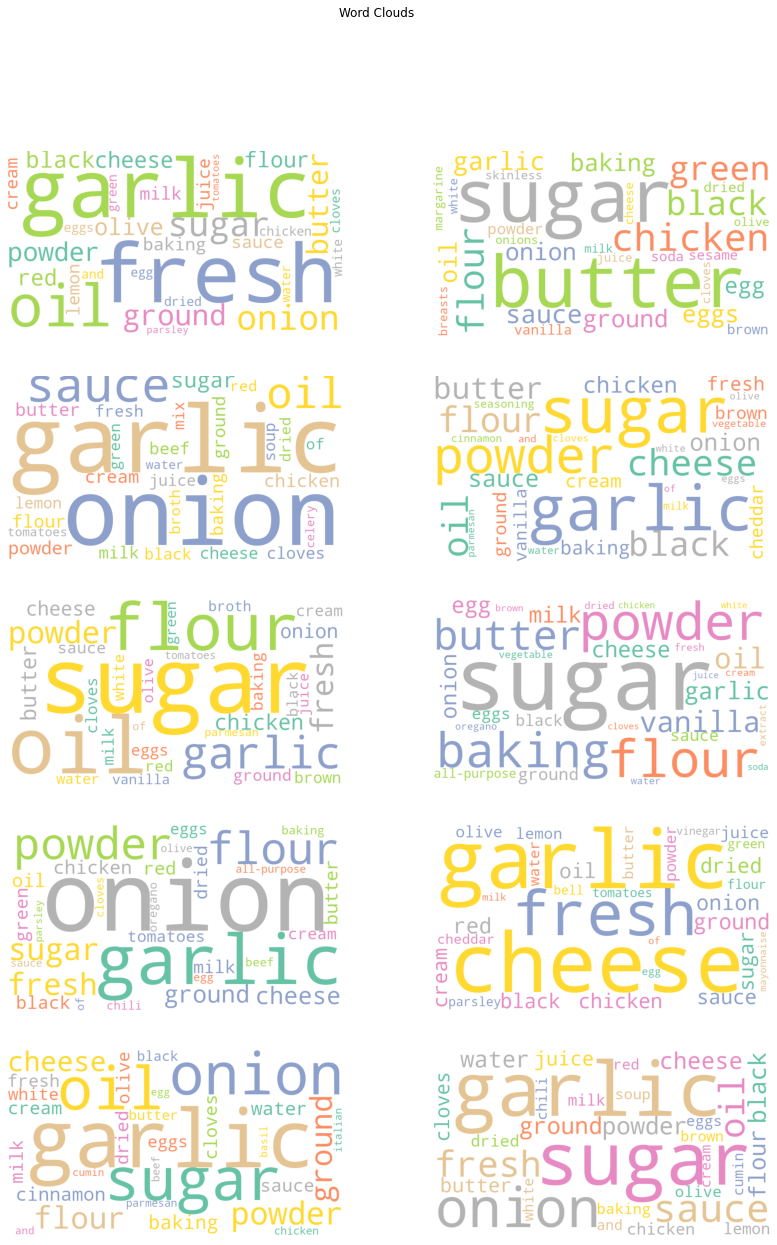

In [47]:
fig = plt.figure(figsize=(14, 20))
fig.patch.set_alpha(0.0)    
fig.suptitle('Word Clouds')

k=0

for i in range(len(list_largest_com)):


    word_cloud = WordCloud(width=900,height=500, 
                            max_words=30,
                            background_color='white',
                            colormap= 'Set2',
                            collocations= False,
                            relative_scaling=1,
                            normalize_plurals=False).generate_from_frequencies(TF_IDF_global[i])

    plt.subplot(5, 2, k + 1)
    plt.tick_params(which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        labelbottom=False,
                        left= False,
                        labelleft = False) # labels along the bottom edge are off
    plt.imshow(word_cloud)
    plt.axis('off')
    
    k+=1

In [ ]:
def create_inv_community_graph(community_idx):
    GC_subgraph = community_subgraph(community_idx)
    community_users = GC_subgraph.nodes
    recipies_community = [recipe['recipe_id'] for node1, node2, recipe in GC_subgraph.edges(data=True)]


    user_recipies_dict={id: [] for id in community_users}

    df_reviews_filter_community = df_reviews_filter[(df_reviews_filter['user_id'].isin(community_users)) & (df_reviews_filter['recipe_id'].isin(recipies_community))]



    for idx, row in tqdm(df_reviews_filter_community.iterrows()): 
        try:
            #for ingredient in row['ingredient_ids']:
            user_recipies_dict[row['user_id']].append(row['recipe_id'])
        except:
            recipe_error.append(row['user_id'])
#print(user_recipies_dict)

    edges_community = [(x,y, {"user_id": key})  for key in user_recipies_dict for x, y in list(combinations(user_recipies_dict[key], 2))] 
    G_inverse = nx.MultiDiGraph()
    G_inverse.add_nodes_from(recipies_community)
    G_inverse.add_edges_from(edges_community)

    return G_inverse

In [ ]:
for community_idx in list_largest_com:
    graph = create_inv_community_graph(community_idx)
    d_c=nx.degree_centrality(graph)
    sorted_centrality= sorted(d_c.items(), key=lambda x: x[1], reverse=True)
    most_common_recipe_id = sorted_centrality[0][0]
    recipe_highest_centrality = df_recipes.loc[df_recipes['id'] == most_common_recipe_id]
    print(f'The recipe with highest centrality is - {recipe_highest_centrality.iloc[0][0]}')
    